<a href="https://colab.research.google.com/github/gavindoughtie/mlmath_class/blob/main/Calculus_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment 2: ML Gradients

* Partial Derivatives of Multivariate Functions
* The Partial-Derivative Chain Rule
* Quadratic Cost
* Gradients
* Gradient Descent
* Backpropagation
* Higher-order Partial Derivatives

## What Partial Derivatives Are

### Multivariate Functions

Even in a simple regression such as $y = mx + b$:

  $y$ is a function of *multiple* variables
  
  -- in this case, $m$ and $b$.

Therefore, we can't calculate the full derivative of $\frac{dy}{dm}$ or $\frac{dy}{db}$.

### Partial Derivatives

Enable the calculation of derivatives of multivariate equations.

Consider the equation $z = x^2 - y^2$

Hands-on demo: [https://www.geogebra.org/3d?lang=en](https://www.geogebra.org/3d?lang=en)

The partial derivative of $z$ with respect to $x$ is obtained by considering $y$ to be a constant:

<img src="https://drive.google.com/uc?id=1-60enV9kU7Gi8RuV9kpZ_HELGZDylOSc">


$z = x^2 - y^2$ Imagine $y$ is any constant, so the derivative becomes:

$\frac{\partial z}{\partial x} = 2x - 0 = 2x$ # NOTE: partial derivative symbol $\partial$ instead of full derivative $d$. (pronounced "del" instead of "dee")

In this example, the partial derivative slope of $z$ along the $x$ axis is *twice* the $x$ axis value.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import math # for constant pi

## Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$:

In [ ]:
def f(my_x, my_y):
  return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$:

In [ ]:
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (at $y = 0$)

In [ ]:
zs_wrt_x = f(xs, 0)

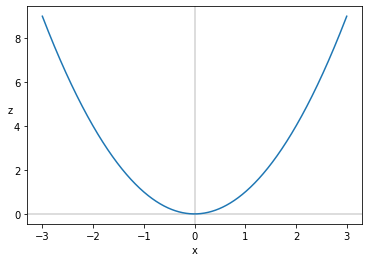

In [ ]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve we can use the partial derivative from the slides:

$\frac{\partial z}{\partial x} = 2x$

In [ ]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
  return 2*my_x

In [ ]:
x_samples = [-2, -1, 0, 1, 2]

In [ ]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [ ]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col): # fprime is the partial derivative function
  my_z = my_f(my_x, my_y) # z = f(x, y)
  plt.scatter(my_x, my_z, c=col, zorder=3)

  tangent_m = fprime(my_x, my_y) # slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = my_z - tangent_m*my_x # line is z=mx+b, so b=z-mx
  tangent_line = tangent_m*my_xs + tangent_b

  plt.plot(my_xs, tangent_line, c=col,
          linestyle='dashed', linewidth=0.7, zorder=3)

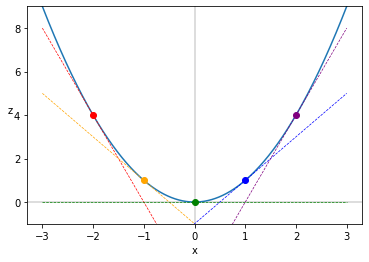

In [ ]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
  point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$.

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value.

Reconsider $z = x^2 - y^2$ from the perspective of $z$ w.r.t. $y$

The partial derivative of $z$ with respect to $y$ is obtained by considering $x$ to be a constant:

<img src="https://drive.google.com/uc?id=1vKstg3iyrxJKbfeUhCpmMEcADOk5cqgu">

$z = x^2 - y^2$

$\frac{\partial z}{\partial y} = 0 -2y = -2y$

The slope of $z$ along the $y$ axis is *twice* the $y$ axis value *and is inverted* (because of the negative sign)

Now let's plot $z$ with respect to $y$ by varying $y$

In [ ]:
ys = np.linspace(-3, 3, 1000)

... while holding $x$ constant ($x = 0$)

In [ ]:
zs_wrt_y = f(0, ys)

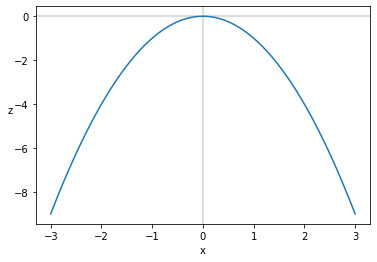

In [ ]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t. $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t. $y$ is the same no matter what $x$ is:

$$
\frac{\partial z}{\partial y} = -2y
$$

So for example, holding $x$ constant at some value other than 0 increases $z$, but has no impact on the slope of $z$ w.r.t. y:

In [ ]:
zs_wrt_y = f(2, ys)

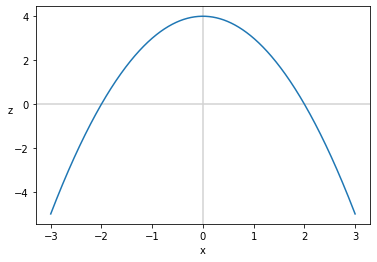

In [ ]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

In [ ]:
def delz_dely(my_x, my_y):
  return -2*my_y

In [ ]:
y_samples = [-2, -1, 0, 1, 2]

In [ ]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # fprime is the partial derivative function
  my_z = my_f(my_x, my_y) # z = f(x, y)
  plt.scatter(my_y, my_z, c=col, zorder=3)

  tangent_m = fprime(my_x, my_y) # slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = my_z - tangent_m*my_y # line is z=mx+b, so b=z-mx
  tangent_line = tangent_m*my_ys + tangent_b

  plt.plot(my_ys, tangent_line, c=col,
          linestyle='dashed', linewidth=0.7, zorder=3)

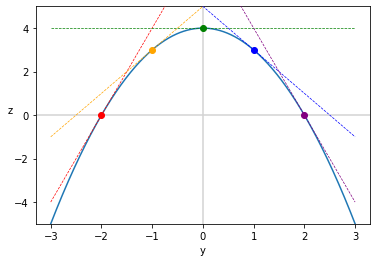

In [ ]:
fix, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating $\frac{\partial z}{\partial y} = -2y$.

That is, the slope of $z$ along the $y$ axis is *twice* the $y$ value and *inverted*, resulting in the parabolic curve opening downward.

### Partial Derivatives Exercieses

for $z = x^2 - y^2$ calculate:

* The value of $z$
* The slope of $z$ with respect to $x$
* And the slope of $z$ with respect to $y$

At the points where:

1. $x = 3$, $y = 0$
2. $x = 2$, $y = 3$
3. $x = -2$, $y = -3$

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation libary to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point ($x$, $y$, $z$):

### Solutions for

$$z = x^2 - y^2$$ 

1. **where $x = 3$, $y = 0$**

value: $z = 3^2 - 0 = 9$

$\frac{\partial z}{\partial x} = 2(3) - 0 = 6 - 0 = 6$

$\frac{\partial z}{\partial y} = 0 - 0 = 0$

2. **where $x = 2$, $y = 3$**

value: $z = 2^2 - 3^2 = 4 -9 = -5$

$\frac{\partial z}{\partial x} = 2(2) - 0 = 4 - 0 = 4$

$\frac{\partial z}{\partial y} = 0 - 2(3) = -6$

3. $x = -2$, $y = -3$

value: $z = -2^2 - -3^2 = 4 - 9 = -5$

$\frac{\partial z}{\partial x} = 2(-2) - 0 = -4$

$\frac{\partial z}{\partial y} = 0 - 2(-3) = 0 - -6 = 6$


## Calculating Partial Derivatives with Autodiff

Determining partial derivatives by hand is helpful for understanding, but in practice autodiff is the way to go. Here's the PyTorch code:

In [ ]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [ ]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [ ]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [ ]:
z.backward() # Autodiff

As we already knew from our exercises above, the slope of the point (0,0,0) is zero with respect to both the $x$ and $y$ axes:

In [ ]:
x.grad

tensor(0.)

In [ ]:
y.grad

tensor(-0.)

In [ ]:
# Repeat of the exercises above

values = [(3., 0.), (2.0,3.), (-2., -3.)]

for x_val, y_val in values:
  x = torch.tensor(x_val).requires_grad_()
  y = torch.tensor(y_val).requires_grad_()
  z = f(x, y)
  z.backward()
  print(f'x = {x}, y = {y}')
  print(f' z = {z}')
  print(f' xgrad: {x.grad}')
  print(f' ygrad: {y.grad}')

  

x = 3.0, y = 0.0
 z = 9.0
 xgrad: 6.0
 ygrad: -0.0
x = 2.0, y = 3.0
 z = -5.0
 xgrad: 4.0
 ygrad: -6.0
x = -2.0, y = -3.0
 z = -5.0
 xgrad: -4.0
 ygrad: 6.0


## Advanced Partial Derivatives

Multivariate function for volume of a cylinder:

$v = \pi r^2l$

$\frac{\partial v}{\partial l} = \pi r^2 \frac{d}{dl}(l)$  (differentiate with respect to length)

= $\pi r^2 (1)$

= $\pi r^2$

$\therefore$ a change in length $l$ corresponds to a change in *volume* by $\pi r^2$

### Partial Derivatives of a Cylinder's Volume in code

For the volume formula $v = \pi r^2l$ where $r$ is the radius of the cylinder and $l$ is its length:

In [ ]:
def cylinder_vol(my_r, my_l):
  return math.pi * my_r**2 * my_l

In [ ]:
# let's say the radius is 3 meters:
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [ ]:
# length of 5 meters
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [ ]:
# Then the volume of the cylinder is 141.4 cubic meters:
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [ ]:
v.backward()

In [ ]:
l.grad

tensor(28.2743)

As we derived above:

$$
\frac{\delta v}{\delta l} = \pi r^2
$$

In [ ]:
math.pi * 3**2

28.274333882308138

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of $28.27m^3$. We can prove this to ourselves:

In [ ]:
cylinder_vol(3, 6)

169.64600329384882

In [ ]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [ ]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

...and with respect to $r$:

$\frac{\partial v}{\partial r} = \pi \frac{d}{dr}(r^2)l$

= $\pi(2r)l$

= $2\pi r l$

$\therefore$ a change in radius $r$ (by an infinitesimally small amount) corresponds to a change in *volume* by $2\pi r l$

In [ ]:
2 * math.pi * r * l

tensor(94.2478, grad_fn=<MulBackward0>)

In [ ]:
r.grad

tensor(94.2478)

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $Δ r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 × 10^{-6}$

In [ ]:
delta = 1e-6
delta

1e-06

In [ ]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta # Dividing by delta restores scale

94.24779531741478

### Advanced Partial Derivative Exercises

Find all the partial derivatives of the following functions:

1. $z = y^3 + 5xy$
2. The surface area of a cylinder: $a = 2\pi r^2 + 2 \pi rh$
3. The volume of a *square prism* with a *cube* cut out of its center is described by $v = x^2y - z^3$

### 1. $z = y^3 + 5xy$

The bit I now understand is that when doing the partial derivatives, the *entire* variable expression becomes the "constant" so $5x$ is constant as is $5y$ and you differentiate on the other part of the expression.

$\frac{\partial z}{\partial y} = 3y^2 + 5x(1) = 3y^2 + 5x$

$\frac{\partial z}{\partial x} = 0 + 5y(1) = 5y$

### 2. The surface area of a cylinder: $a = 2\pi r^2 + 2 \pi rh$

* variables are $r$ and $h$

$\frac{\partial a}{\partial h} = 0 + 2 \pi r (1) = 2 \pi r$
* No $h$ in first term, so the entire term is a constant, so its derivative is 0
* second term follows the power rule for $1h^0 = 1$ and remember $2 \pi r$ is a constant

$\frac{\partial a}{\partial r} = 2 \pi(2r) + 2 \pi h(1) = 4 \pi r + 2 \pi r(1) = 4 \pi r + 2 \pi h$
* Differentiate the first term normally for $r$, $2\pi$ is treated like a constant!
* r is the variable that gets differentiated in the second term, so it's $r^1 = 1r^0 = 1$.

### 3. The volume of a *square prism* with a *cube* cut out of its center is described by
### $v = x^2y - z^3$

$\frac{\partial v}{\partial x} = 2xy - 0 = 2xy$

$\frac{\partial v}{\partial y} = x^2 \cdot 1 - 0 = x^2$

$\frac{\partial v}{\partial z} 2x \cdot 0 - 3z^2 = -3z^2$


### Partial Derivative Notation

$$
z = f(x, y)
$$

$$
\frac{\partial z}{\partial x}
$$

OR

$$
 \frac{\partial f}{\partial x}
 $$
 
 OR
 
 $$
  f_x
  $$
  OR
  
  $$
   D_xf
$$

### The Chain Rule for Partial Derivatives

Let's say $y = f(u)$ and $u = g(x)$

Recall that the chain rule for full derivatives would be:

$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}
$$

With univariate functions, the partial derivative is identical:

$$
\frac{dy}{dx} = \frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x}
$$

With a multivariate function, the partial derivative is more interesting:

$y = f(u)$ and $u = g(x, z)$

So you could think of $u$ having inputs $x$ and $z$ and thus differentiate for each:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} \ \ \ \ \ \ \ 
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial z}
$$

With multiple multivariate functions, it gets really interesting:

$y = f(u, v)$

$u = g(x, z)$ 

$v = h(x, z)$

Again, imagine a single tree, so derivatives are:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} + 
\frac{\partial y}{\partial v} \frac{\partial v}{\partial x}
$$

$$
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial z} + 
\frac{\partial y}{\partial v} \frac{\partial v}{\partial z}
$$

In other words, you can sum the partial derivative chain of each term.

Generalizing completely:

$y = f(u_1, u_2, \dots, u_m)$

$u_j = g(x_1, x_2, \dots, x_n)$

for $i = 1,2,\dots,n$:

$$
\frac{\partial y}{\partial x_i} = 
\frac{\partial y}{\partial u_1}
\frac{\partial u_1}{\partial x_i} + 
\frac{\partial y}{\partial u_2}
\frac{\partial u_2}{\partial x_i} + \dots +
\frac{\partial y}{\partial u_m}
\frac{\partial u_m}{\partial x_i}
$$

### Multivariate Chain Rule Exercises

Find all the partial derivatives of $y$, where:

1. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(z)$
2. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(x, z)$
3. $y = f(u, v, w) \ \ \ u = g(x) \ \ \ v = h(x) \ \ \ w = j(x)$


### 1. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(z)$

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x}
$$

$$
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial v} \frac{\partial v}{\partial z} 
$$


### 2. $y = f(u, v) \ \ \ u = g(x) \ \ \ v = h(x, z)$

Note that $x$ appears in both $u$ and $v$, but $z$ only appears in one. So the partial derivative of $x$ uses the sum of both derivatives:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} +
\frac{\partial y}{\partial v} \frac{\partial v}{\partial x} 
$$

$$
\frac{\partial y}{\partial z} = \frac{\partial y}{\partial v} \frac{\partial v}{\partial z}
$$


### 3. $y = f(u, v, w) \ \ \ u = g(x) \ \ \ v = h(x) \ \ \ w = j(x)$

$x$ appears in all three functions, so differentiate each and sum:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} +
\frac{\partial y}{\partial v} \frac{\partial v}{\partial x}  +
\frac{\partial y}{\partial w} \frac{\partial w}{\partial x} 
$$

But note! This is also the *full derivative* $\frac{dy}{dx}$ because $y$ depends only on $x$.



## Point by Point Regression

Or, how I learned how to implement automatic differentiaton from first principles.

(a.k.a. Linear regression FTW!)

## Gradients of Cost w.r.t. Model Parameters

Here we calculate the gradient of quadratic cost with respect to a straight-line regression model's parameters. We keep the partial derivatives as simple as possible by limiting the model to handling a single data point.

In [ ]:
import torch

In [ ]:
# Same data as regression in pytorch and the moore-penrose pseudoinverse
# (supposedly mls of an Alzheimer's drug)
xs = torch.tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [ ]:
# Fictional "forgetfulness" score of patients
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The slope of a line is still $y = mx + b$:


In [ ]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + b

Initialize $m$ and $b$ with the same "random" near-zero values as in our regression notebook:

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

To keep the partial derivatives as simple as possible, let's move forward with a single instance $i$ from the eight possible data points:

In [ ]:
i = 7
x = xs[i]
y = ys[i]

In [ ]:
x

tensor(7.)

In [ ]:
y

tensor(-1.3700)

**Step 1**: Forward pass

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [ ]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost **$C$**.

In the previous regressiion notebook, we used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by:

$$
C = (\hat{y} - y)^2
$$

In [ ]:
def squared_error(my_yhat, my_y):
  return (my_yhat - my_y)**2

In [ ]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [ ]:
C.backward()

The partial derivative of $C$ with respect to $m \left( \frac{\partial C}{\partial m} \right)$ is:

In [ ]:
m.grad

tensor([108.7800])

and the partial derivative of $C$ with respect to $m \left( \frac{\partial C}{\partial b} \right)$ is:

In [ ]:
b.grad

tensor([15.5400])

### Deriving the partial derivatives of quadratic cost by hand

$
C = (\hat{y} - y)^2
$

is actually two nested functions:

$C = u^2$

$u = \hat{y} - y$

starting with the inner function:

$
\frac{\partial u}{\partial \hat{y}} = 1({\hat{y}}\ \ ^0) - 0 = 1 - 0 = 1
$

Note that we don't really care about $y$ as it's just a data point. What matters is cost with respect to the input parameters $m$ and $b$ which is what produce the value $\hat{y}$.

Then the outer:

$
\frac{dC}{du} = \frac{\partial C}{\partial u} = 2u = 2(\hat{y} - y)
$

Then chain together:

$
\frac{\partial C}{\partial \hat{y}} = \frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y}} =
(2(\hat{y} - y))(1) = 2(\hat{y} -y)
$

### Predicted $y$ w.r.t. Model Parameters

$\hat{y} = mx + b$

$\frac{\partial \hat{y}}{\partial b} = 1(0x^0) + 1b^0 = 0 + 1 = 1$

$\frac{\partial \hat{y}}{\partial m} = 1(x) + 0 = x$ (power rule on $m$ is 1)

Putting all these partial derivatives together with the chain rule:

$
\frac{\partial C}{\partial \hat{y}} = 2(\hat{y} -y)
\ \ \ \
\frac{\partial \hat{y}}{\partial m} = x
\ \ \ \
\frac{\partial \hat{y}}{\partial b} = 1
$

with respect to $m$:

$
\frac{\partial C}{\partial m} = 
\frac{\partial C}{\partial \hat{y}}
\frac{\partial \hat{y}}{\partial m} =
(2(\hat{y} -y))x = 2x(\hat{y} - y)
$

with respect to $b$:

$
\frac{\partial C}{\partial b} = 
\frac{\partial C}{\partial \hat{y}}
\frac{\partial \hat{y}}{\partial b} = (2\hat{y} -y)1 = 2(\hat{y} -y)
$

In [ ]:
2 * x * (yhat.item() - y) # partial derivative of cost with respect to m

tensor(108.7800)

In [ ]:
2 * (yhat.item() - y) # partial derivative of cost with respect to b

tensor(15.5400)

## The Gradient of Cost, $\nabla C$

The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters:

$
\nabla C = \nabla_pC = \left[
  \frac{\partial C}{\partial p_1},
  \frac{\partial C}{\partial p_2},
  \dots,
  \frac{\partial C}{\partial p_n},
\right]^T
$

Note that it's transposed to be a column vector.

In this case, there are only two parameters, $b$ and $m$:

$
\nabla C = \nabla_pC = \left[
  \frac{\partial C}{\partial b},
  \frac{\partial C}{\partial m},
\right]^T
$

In [ ]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

## Gradient Descent

* Calculate the gradient of mean squared error on a batch of data
* Visualize gradient descent in action

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# regression function, xs, ys, m and b same as above, repeated here for convenience:
# Same data as regression in pytorch and the moore-penrose pseudoinverse

# (supposedly mls of an Alzheimer's drug)
xs = torch.tensor([0., 1., 2., 3., 4., 5., 6., 7.])

# Fictional "forgetfulness" score of patients
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()


def regression(my_x, my_m, my_b):
  return my_m*my_x + b

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1**: Forward Pass

In [ ]:
# Now we're working with a whole batch of data as we would be in a real model,
# so each element of yhats is our initial result for a single data point from
# xs regressed against our random m and b parameters
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

We're using mean squared error, which averages quadratic cost across multiple data points:

$$
C = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

In [ ]:
def mse(my_yhat, my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return sigma / len(my_y)

In [ ]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [ ]:
C.backward()

In [ ]:
m.grad

tensor([36.3050])

In [ ]:
b.grad

tensor([6.2650])

### Deriving Cost by hand to find $\frac{\partial C}{\partial m} \ \ \frac{\partial C}{\partial b}$

Mean Squared Error:

$$
C = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

So you can decompose it to these two chain-rule obeying equations:

$$
C = \frac{1}{n} \sum_{i=1}^n{u^2}
$$

$$
u = \hat{y}_i - y_i
$$

Solving for the model parameters $m$ and $b$, which are embedded in the values calculated into $\hat{y}$.

$\frac{\partial u}{\partial \hat{y}_i} = 1 - 0 = 1$

$\frac{\partial C}{\partial u} = \frac{1}{n} \sum 2u$

= $\frac{2}{n} \sum u$

= $\frac{2}{n} \sum \left(\hat{y}_i - y_i\right)$

Now, calculate the partial derivatives for the parameters (derivation earlier in these notebooks):

$\frac{\partial \hat{y}_i}{\partial m} = X_i$

$\frac{\partial \hat{y}_i}{\partial b} = 1$

Start with $b$ because the math is a little simpler:

$$
\frac{\partial C}{\partial b} = 
\frac{\partial C}{\partial u} 
\frac{\partial u}{\partial \hat{y}_i}
\frac{\partial \hat{y}_i}{\partial b}
$$

= $
\frac{2}{n} \sum \left(\hat{y}_i - y_i \right) \cdot 1 \cdot 1 =
\frac{2}{n} \sum \left(\hat{y}_i - y_i \right)
$

Note the chain rule working on $\partial u$ and $\partial \hat{y}_i$

Trickier for $m$:

$$
\frac{\partial C}{\partial m} = 
\frac{\partial C}{\partial u} 
\frac{\partial u}{\partial \hat{y}_i}
\frac{\partial \hat{y}_i}{\partial m}
$$

= $
\frac{2}{n} \sum (\hat{y}_i - y_i)
\cdot 1
\cdot X_i
$
= $
\frac{2}{n} \sum (\hat{y}_i - y_i)
\cdot X_i
$



In [ ]:
# dC/dm
2 * 1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [ ]:
# dC/db
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

We don't need to explicitly create a $\nabla C$ object (Greek inverted delta is called $nabla$ for "harp" but w.r.t gradient is *del* as in "del C") for the remainder of the code in this notebook to run, but let's make it anyway and we'll use it later:

In [ ]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T # alphabetically order and put into column order with T
gradient

tensor([[ 6.2650],
        [36.3050]])

Let's visualize the most pertinent metrics in a single plot:

In [ ]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
  title = f'Cost = {my_C.item():.3g}'

  if include_grad:
    xlabel = f'm = {my_m.item():.3}, m grad = {my_m.grad.item():.3}'
    ylabel = f'b = {my_b.item():.3}, m grad = {my_b.grad.item():.3}'
  else:
    xlabel = f'm = {my_m.item():.3}'
    ylabel = f'b = {my_b.item():.3}'

  fig, ax = plt.subplots()

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)

  ax.scatter(my_x, my_y)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach()
  y_max = regression(x_max, my_m, my_b).detach()

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

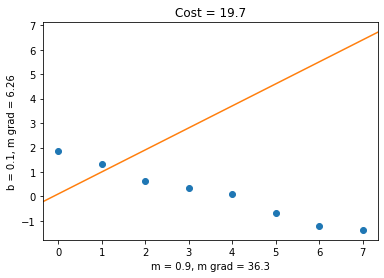

In [ ]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4**: Gradient descent

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$.

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefor to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$.

In [ ]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [ ]:
optimizer.step() # Performs the gradient descent

In [ ]:
C = mse(regression(xs, m, b), ys) # Recompute the cost after the step

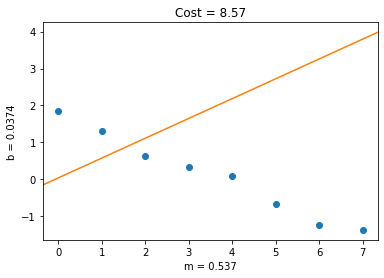

In [ ]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C not yet recalculated

### Rinse and Repeat

Observe further rounds of training:

In [ ]:
epochs = 1000

for epoch in range(epochs):
  optimizer.zero_grad() # reset so they don't accumulate

  yhats = regression(xs, m, b) # Step 1
  C = mse(yhats, ys) # Step 2

  C.backward() # Step 3

  #labeled_regression_plot(xs, ys, m, b, C)

  optimizer.step() # Step 4

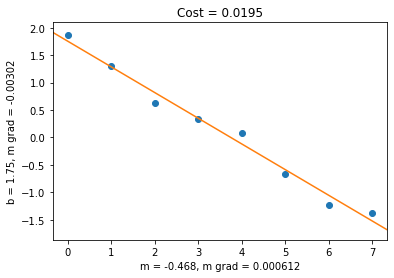

In [ ]:
labeled_regression_plot(xs, ys, m, b, C)

In later rounds of training, after the model's slope $m$ has become closer to the slope represented by the data, $\frac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\frac{\partial C}{\partial m}$ remains positive.

This combination directs gradient descent to simultaneously adjust the $y$-intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data.

## Backpropagation

Chain rule of partial derivatives of *cost* w.r.t model parameters extends to deep neural networks, which may have 1000s of layers:

Training data into batches, each batch ($X$), forward pass through layers (just regression here but any multiplication/activation function), then you get $\hat{y$}$, compute the cost $C$.

Once you have $C$, calculate the partial derivative of cost for each parameter and using the chain rule, re-calculate the cost backwards through the layers, finally using gradient descent to adjust the parameters.

## Higher-order Partial Derivatives

**Regular higher-order derivatives:**

In the driving example the first derivative of distance/time is the speed, but the second derivative of speed/time is acceleration.

**Higher-order partial derivatives:**

In ML, used to accelerate through gradient descent (Optimization)

Consider the following first-order partial derivatives...

$z = x^2 + 5xy + 2y^2$

$
\frac{\partial z}{\partial x} = 2x + 5y(1) + 0 =
2x + 5y
$

$
\frac{\partial z}{\partial y} = 
0 + 5x + 4y = 5x + 4y
$

**Second-order partial derivatives**

Starting with:

$
\frac{\partial z}{\partial x} =
2x + 5y
\ \ \ \
\frac{\partial z}{\partial y} = 
5x + 4y
$

Unmixed:

Differentiate w.r.t. the same variable again:

$
\frac{\partial^2 z}{\partial x^2} =
\frac{\partial}{\partial x}(2x + 5y) =
2(1) + 0 =
2 + 0 = 2
$

$
\frac{\partial^2 z}{\partial y^2} =
\frac{\partial}{\partial y}(5x + 4y) =
0 + 4(1) = 4
$

Mixed partial derivates:

$
\frac{\partial^2 z}{\partial x \partial y} =
\frac{\partial}{\partial x}\left(\frac{dz}{dy}\right) =
\frac{\partial}{\partial x}(5x + 4y) =
5(1) + 0 = 5
$

$
\frac{\partial^2 z}{\partial y \partial x} =
\frac{\partial}{\partial y}\left(\frac{dz}{dx}\right) =
\frac{\partial}{\partial y}(2x + 5y) =
0 + 5(1) = 5
$

Notice how both mixed second-order derivatives come out to the same value?

*Clairant's (or Schwatz's or Young's) Theorem*:

Under certain (common) conditions:

$$
\frac{\partial^2 z}{\partial x \partial y} = \frac{\partial^2 z}{\partial y \partial x}
$$

But... what are those conditions?



### Higher-order Partial Derivative Notation

Given the a function like $z = f(x, y)$

Equivalent second-order (unmixed) partial derivative notations are:

$
\frac{\partial^2 z}{\partial x^2}
\ \ \ \
\frac{\partial^2 f}{\partial x^2}
\ \ \ \
f_{xx}
\ \ \ \
D_{xx}f
$

For the mixed second-order partial derivatives:

$
\frac{\partial^2 z}{\partial y \partial x}
\ \ \ \
\frac{\partial^2 f}{\partial y \partial x}
\ \ \ \
f_{xy}
\ \ \ \
D_{xy}f
$

The mixed notation means you differentiate left to right for the subscripts.

### Higher order partial derivative exercise:

Find all the second-order partial derivatives of $z = x^3 + 2xy$

First, find the first-order partial derivatives.
